In [1]:
import numpy as np

# Temperatura e composições de teste

T = 293.15            #K
x = np.array([.5,.5]) #normalized


# De acordo com o modelo NRTL, o parâmetro não-aleatório é fixado em 0.2 para todos os pares binários

alpha12 = alpha21 = 0.3


# Parâmetros de interação binárias

#A12 = -1113.1 #K    Chafer
#A21 = 1217.37 #K    Chafer

A12 = 976      #K    Renon
A21 = 88       #K    Renon

In [2]:
#assemble matrix with regressed parameters A_i,j, according to the model all diagonal terms are zero
A = np.array([[0, A12],
             [A21, 0]])

#assemble symmetric matrix alpha
alpha = np.array([[0, alpha12],
                [alpha21, 0]])

print(alpha)

[[ 0.   0.3]
 [ 0.3  0. ]]


In [3]:
#verify the assembled matrices

#we can now automatically loop through its elements

print("i,j,alpha[i,j],A[i,j]")
for i in range(2):
    for j in range(2):
        print(i,j,alpha[i,j],A[i,j])
        
#or even use the whole matrix at once
print("")
print("alpha=")
print(alpha)
print("")
print("A=")
print(A)
print("")
# rather than typing each element individually
print("alpha12,alpha21")
print(alpha12,alpha21)
print("")
print("A12,A21")
print(A12,A21)

i,j,alpha[i,j],A[i,j]
0 0 0.0 0
0 1 0.3 976
1 0 0.3 88
1 1 0.0 0

alpha=
[[ 0.   0.3]
 [ 0.3  0. ]]

A=
[[  0 976]
 [ 88   0]]

alpha12,alpha21
0.3 0.3

A12,A21
976 88


In [4]:
# Matriz Tau

tau=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        tau[j,i]=A[j,i]/T
print("tau=")
print(tau)

print("")

# Matriz G

G=np.zeros([2,2])
for j in range(2):
    for i in range(2):
        G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
print("G=")
print(G)

tau=
[[ 0.          3.32935357]
 [ 0.30018762  0.        ]]

G=
[[ 1.          0.36831893]
 [ 0.91387975  1.        ]]


In [5]:
# Definição de Gamma

def Gamma(T,x,alpha,A):

    tau=np.zeros([2,2]) # Água e Etanol
    for j in range(2):
        for i in range(2):
            tau[j,i]=A[j,i]/T    
    
    G=np.zeros([2,2])
    for j in range(2):
        for i in range(2):
            G[j,i]=np.exp((-alpha[j,i]*tau[j,i]))
    
    Gamma=np.zeros([2])
    for i in range(2):

        Sj1=0
        Sj2=0
        Sj3=0
        for j in range(2):
            Sj1 += tau[j,i]*G[j,i]*x[j]
            Sj2 += G[j,i]*x[j]
    
            Sk1=0
            Sk2=0
            Sk3=0
            for k in range(2):
                Sk1 += G[k,j]*x[k]
                Sk2 += x[k]*tau[k,j]*G[k,j]
                Sk3 += G[k,j]*x[k]
            
            Sj3 += ((x[j]*G[i,j])/(Sk1))*(tau[i,j]-(Sk2)/(Sk3))
        
        Gamma[i]=np.exp(Sj1/Sj2 + Sj3)
    
    return Gamma

print(Gamma(T,x,alpha,A))

[ 2.06142336  1.37180318]


In [6]:
# Temperatura especificada

T = 0 # Unidade K

grid_T       = np.zeros(1000)
grid_Gamma0  = np.zeros(1000)
grid_Gamma1  = np.zeros(1000)
grid_Gamma2  = np.zeros(1000)
grid_Gamma3  = np.zeros(1000)
grid_Gamma4  = np.zeros(1000)
grid_Gamma5  = np.zeros(1000)
grid_Gamma6  = np.zeros(1000)
grid_Gamma7  = np.zeros(1000)
grid_Gamma8  = np.zeros(1000)

x_vetor0 = [0.1,0.9]
x_vetor1 = [0.2,0.8]
x_vetor2 = [0.3,0.7]
x_vetor3 = [0.4,0.6]
x_vetor4 = [0.5,0.5]
x_vetor5 = [0.6,0.4]
x_vetor6 = [0.7,0.3]
x_vetor7 = [0.8,0.2]
x_vetor8 = [0.9,0.1]

i = 0

for T in np.linspace(0,873,1000):
    
    grid_T[i]       = T
    
    grid_Gamma0[i]  = Gamma(T,x_vetor0,alpha,A)[0]
    
    grid_Gamma1[i]  = Gamma(T,x_vetor1,alpha,A)[0]
    
    grid_Gamma2[i]  = Gamma(T,x_vetor2,alpha,A)[0]
    
    grid_Gamma3[i]  = Gamma(T,x_vetor3,alpha,A)[0]
    
    grid_Gamma4[i]  = Gamma(T,x_vetor4,alpha,A)[0]
    
    grid_Gamma5[i]  = Gamma(T,x_vetor5,alpha,A)[0]
    
    grid_Gamma6[i]  = Gamma(T,x_vetor6,alpha,A)[0]
    
    grid_Gamma7[i]  = Gamma(T,x_vetor7,alpha,A)[0]
    
    grid_Gamma8[i]  = Gamma(T,x_vetor8,alpha,A)[0]
    
#    grid_lnGamma[i] = np.log(grid_Gamma[i])
    
#    print(i,x1,u[i],grid_P_bolha[i])
    
    i = i+1
    
#print(grid_T,grid_Gamma)

C:\Users\epl0\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
C:\Users\epl0\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\epl0\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\epl0\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in double_scalars


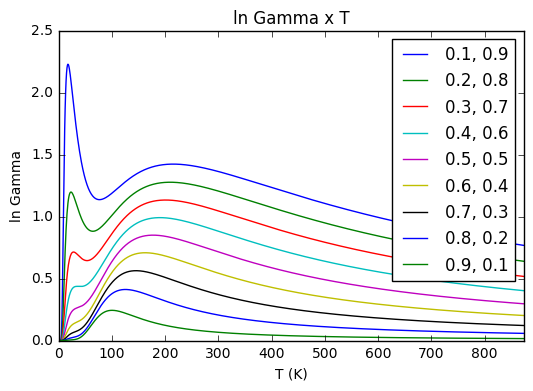

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#ativar uma figura 1
plt.figure(1)

#legend=[] #iniciador do objeto legenda

#plt.subplot(121) #activate a subplot
plt.title('ln Gamma x T')
plt.xlabel('T (K)')
plt.ylabel('ln Gamma')
plt.xlim([0,873])

#traçar
plt.plot(grid_T,np.log(grid_Gamma0), label='0.1, 0.9') #label é a etiqueta que será usada na legenda
plt.plot(grid_T,np.log(grid_Gamma1), label='0.2, 0.8')
plt.plot(grid_T,np.log(grid_Gamma2), label='0.3, 0.7')
plt.plot(grid_T,np.log(grid_Gamma3), label='0.4, 0.6')
plt.plot(grid_T,np.log(grid_Gamma4), label='0.5, 0.5')
plt.plot(grid_T,np.log(grid_Gamma5), label='0.6, 0.4')
plt.plot(grid_T,np.log(grid_Gamma6), label='0.7, 0.3')
plt.plot(grid_T,np.log(grid_Gamma7), label='0.8, 0.2')
plt.plot(grid_T,np.log(grid_Gamma8), label='0.9, 0.1')

plt.legend(loc=1)


plt.show()

In [ ]:
def hpartmolNUMERICO(T):
    d=1e-5

    mais = np.log(Gamma(x,T+d,alpha,A))/(T+d)
    menos = np.log(Gamma(x,T-d,alpha,A))/(T-d)
    
    dlngammasobreTdT = (mais- menos)/(2*d)
    
    return R*T*(dlngammasobreTdT)